In [1]:
%matplotlib inline

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['figure.figsize'] = '7, 5'

In [3]:
def make_figure_axes(x, y, fig_number=1, fig_size=8):
    '''
    Creates a set of 3 axes to plot 2D function + marginals
    '''
    # determine max size
    size_x = x.max() - x.min()
    size_y = y.max() - y.min()
    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    if size_x >= size_y:
        fig_size_x = fig_size
        fig_size_y = (0.12 * fig_size_x +
                      0.65 * fig_size_x * min_size / max_size +
                      0.02 * fig_size_x +
                      0.18 * fig_size_x +
                      0.03 * fig_size_x)
        rect_main = [0.12,
                     0.12 * fig_size_x / fig_size_y,
                     0.65,
                     0.65 * fig_size_x * min_size / max_size / fig_size_y]
        rect_x = [0.12, ((0.12 + 0.65 * min_size / max_size + 0.02) *
                         fig_size_x / fig_size_y),
                  0.65, 0.18 * fig_size_x / fig_size_y]
        rect_y = [0.79, 0.12 * fig_size_x / fig_size_y,
                  0.18, 0.65 * fig_size_x * min_size / max_size / fig_size_y]
    else:
        fig_size_y = fig_size
        fig_size_x = (0.12 * fig_size_y +
                      0.65 * fig_size_y * min_size / max_size +
                      0.02 * fig_size_y +
                      0.18 * fig_size_y +
                      0.03 * fig_size_y)
        rect_main = [0.12 * fig_size_y / fig_size_x,
                     0.12,
                     0.65 * fig_size_y * min_size / max_size / fig_size_x,
                     0.65]
        rect_x = [0.12 * fig_size_y / fig_size_x, 0.79,
                  0.65 * fig_size_y * min_size / max_size / fig_size_x, 0.18]
        rect_y = [((0.12 + 0.65 * min_size / max_size + 0.02) *
                   fig_size_y / fig_size_x), 0.12,
                  0.18 * fig_size_y / fig_size_x, 0.65]

    fig = plt.figure(fig_number, figsize=(fig_size_x, fig_size_y))
    fig.clf()

    ax_main = fig.add_axes(rect_main)
    ax_marginal_x = fig.add_axes(rect_x, xticklabels=[])
    ax_marginal_y = fig.add_axes(rect_y, yticklabels=[])

    return ax_main, ax_marginal_x, ax_marginal_y


def plot_distribution(x, y, z, cmap='viridis'):
    x_limits = (x.min(), x.max())
    y_limits = (y.min(), y.max())

    ax_main, ax_marginal_x, ax_marginal_y = make_figure_axes(x, y)
    ax_main.pcolormesh(x, y, z, cmap=cmap)

    marginal_x = np.sum(z, axis=1)
    ax_marginal_x.plot(x[:,0], marginal_x)
    [l.set_rotation(-90) for l in ax_marginal_y.get_xticklabels()]

    marginal_y = np.sum(z, axis=0)
    ax_marginal_y.plot(marginal_y, y[0])

    ax_main.set_xlim(x_limits)
    ax_main.set_ylim(y_limits)

    ax_marginal_x.set_xlim(x_limits)
    ax_marginal_y.set_ylim(y_limits)
    return ax_main, ax_marginal_x, ax_marginal_y

# Generaremos datos de un polinomio de orden 1

Un fit simple de orden 2 se muestra en la figura. Al aumentar el orden del polinomio, estamos aumentando los grados de libertad del modelo, por lo que es mas facil obtener un mejor fit, en el sentido de que si $\chi^2$ sera menor. En el caso extremo, si fiteamos un polinomio de orden `m`, para un set de `m` datos, $\chi^2$ sera cero.

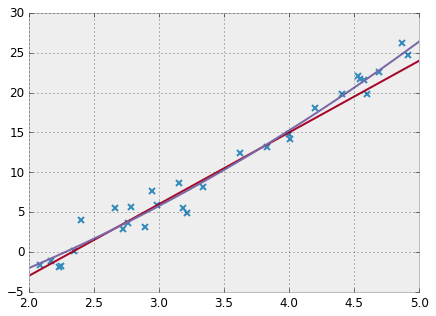

In [4]:
coefs = [9, -21]
N_sample = 30

np.random.seed(43)
x_data = np.random.uniform(2, 5., size=N_sample)
y_data = coefs[0] * x_data + coefs[1] + np.random.normal(0, 1.5, size=N_sample)
plt.plot(x_data, y_data, 'x', mew=2.)

plt.plot(np.linspace(2, 5, 100), np.polyval(coefs, np.linspace(2, 5, 100)))

p_orden2 = np.polyfit(x_data, y_data, 2)
plt.plot(np.linspace(2, 5, 100), np.polyval(p_orden2, np.linspace(2, 5, 100)))

In [5]:
print "Los coeficientes del polinomio de orden 2 son: ", p_orden2

Los coeficientes del polinomio de orden 2 son:  [  0.84255639   3.58224871 -12.55600983]


# Calculemos la verosimilitud de un fit polinomico de orden 1 vs. de orden 2.

In [6]:
def likelihood(data, pars):
    x, y = data
    orden = np.sum(pars != 0)
    S = np.sum((y - np.polyval(pars, x))**2) / 2 / 1.5**2
    L = (2 * np.pi * 1.5**2)**(-orden / 2) * np.exp(-S)
    return L

def chi2(data, pars):
    x, y = data
    chi2 = np.sum((y - np.polyval(pars, x))**2)/1.5**2
    return chi2

In [7]:
# fit de orden 1
p_orden1 = np.polyfit(x_data, y_data, 1)
print "Verosimilitud del modelo de orden 1: ", likelihood([x_data, y_data], p_orden1)
print "Verosimilitud del modelo de orden 2: ", likelihood([x_data, y_data], p_orden2)

print "Chi2 para el modelo de orden 1: ", chi2([x_data, y_data], p_orden1)
print "Chi2 para el modelo de orden 2: ", chi2([x_data, y_data], p_orden2)

Verosimilitud del modelo de orden 1:  3.45574888074e-08
Verosimilitud del modelo de orden 2:  6.3079367444e-08
Chi2 para el modelo de orden 1:  29.0636685497
Chi2 para el modelo de orden 2:  25.2113223576


El modelo de orden 2 tiene mayor verosimilitud (es decir, un menor $\chi^2$), por lo que bajo un analisis de máxima verosimilitud podría parecer un mejor modelo.

# Ahora seleccionemos el mejor modelo utilizando seleccion Bayesiana.

Lo primero es calcular la probabilidad posterior (no normalizada) para cada uno de los modelos:

M1 = polinomio grado 1

M2 = polinomio grado 2

## Evidence for M1

In [8]:
def prior(beta, params):
    beta0, beta1 = beta
    mu0, sigma0, mu1, sigma1 = params
    S = -1. / 2 * ((beta0 - mu0)**2 / sigma0**2 + (beta1 - mu1)**2 / sigma1**2)
    P = np.exp(S) / (2 * np.pi * sigma0 * sigma1)
    return P

def likelihood(beta, data):
    beta0, beta1 = beta
    x, y = data
    try:
        N = len(x)
    except:
        N = 1
    S = np.sum((y - beta1 - beta0 * x)**2)
    L = (2 * np.pi * 1.5**2)**(-N / 2.) * np.exp(-S / 2 / 1.5**2)
    return L

In [9]:
beta0_grid, beta1_grid = np.mgrid[5:15:201j, -30:-15:201j]
n0, n1 = beta0_grid.shape
prior_m1 = np.zeros((n0, n1))
likelihood_m1 = np.zeros((n0, n1))

for i in range(n0):
    for j in range(n1):
        prior_m1[i, j] = prior([beta0_grid[i, j], beta1_grid[i, j]], [10, 20, -20, 20])
        likelihood_m1[i, j] = likelihood([beta0_grid[i, j], beta1_grid[i, j]], [x_data, y_data])

(<matplotlib.axes._axes.Axes at 0x10889aa50>,
 <matplotlib.axes._axes.Axes at 0x108bf7790>)

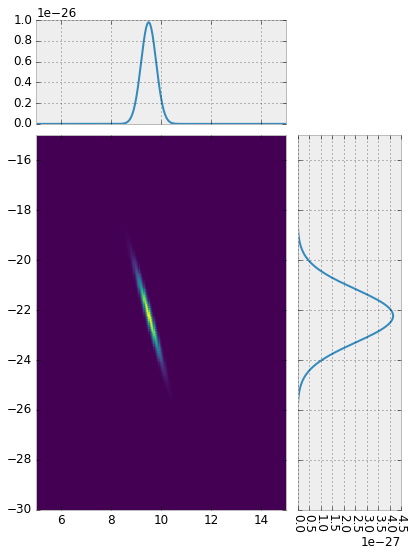

In [10]:
plot_distribution(beta0_grid, beta1_grid, prior_m1 * likelihood_m1)

In [11]:
dx = 20 / 200
dy = 15 / 200
P_E_M1 = np.sum(prior_m1 * likelihood_m1) * dx * dy
print 'P(D|M1) = ', P_E_M1

P(D|M1) =  1.11188583931e-27


## Evidence for M2

In [12]:
def prior(beta, params):
    beta0, beta1, beta2 = beta
    mu0, sigma0, mu1, sigma1, mu2, sigma2 = params
    S = -1. / 2 * ((beta0 - mu0)**2 / sigma0**2 + (beta1 - mu1)**2 / sigma1**2 + (beta2 - mu2)**2 / sigma2**2)
    P = np.exp(S) / ((2 * np.pi)**(3/2) * sigma0 * sigma1 * sigma2)
    return P

def likelihood(beta, data):
    beta0, beta1, beta2 = beta
    x, y = data
    try:
        N = len(x)
    except:
        N = 1
    S = np.sum((y - beta2 - beta1 * x - beta0 * x**2)**2)
    L = (2 * np.pi * 1.5**2)**(-N / 2.) * np.exp(-S / 2 / 1.5**2)
    return L

### La siguiente celda demora mucho en correr, es por problemas como este que se recurre a metodos MCMC para hacer las integraciones.

In [20]:
%%timeit -n1
beta0_grid, beta1_grid, beta2_grid = np.mgrid[-5:6:201j, -10:15:201j, -30:5:201j]
n0, n1, n2 = beta0_grid.shape
prior_m2 = np.zeros((n0, n1, n2))
likelihood_m2 = np.zeros((n0, n1, n2))

for i in range(n0):
    for j in range(n1):
        for k in range(n2):
            prior_m2[i, j, k] = prior([beta0_grid[i, j, k], beta1_grid[i, j, k], beta2_grid[i, j, k]], [1, 20, 10, 20, -10, 20])
            likelihood_m2[i, j, k] = likelihood([beta0_grid[i, j, k], beta1_grid[i, j, k], beta2_grid[i, j, k]], [x_data, y_data])

1 loop, best of 3: 2min 22s per loop


## Ploteamos una proyeccion

(<matplotlib.axes._axes.Axes at 0x114d36450>,
 <matplotlib.axes._axes.Axes at 0x133e8a750>)

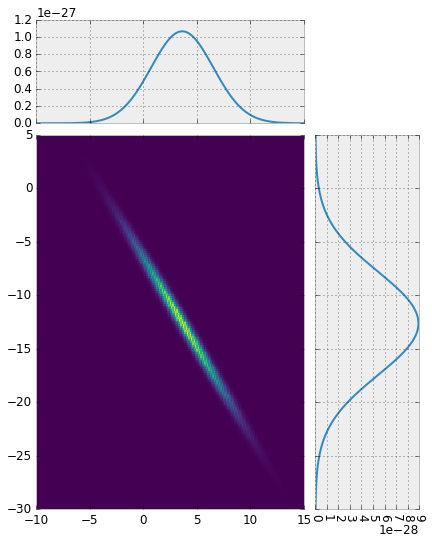

In [16]:
post_m2 = prior_m2 * likelihood_m2
plot_distribution(beta1_grid[0], beta2_grid[0], np.sum(post_m2, axis=0))

In [17]:
dx = 11 / 200
dy = 25 / 200
dz = 35 / 200
P_E_M2 = np.sum(post_m2) * dx * dy * dz
print 'P(D|M2) = ', P_E_M2

P(D|M2) =  7.45869526549e-29


# El Factor Bayesiano:

In [18]:
print 'P(D|M1) / P(D|M2) = ', P_E_M1 / P_E_M2

P(D|M1) / P(D|M2) =  14.9072431535


es decir, a pesar de que el modelo tiene mas grados de libertad, la probabilidad de que sea el modelo a preferir es menor que para el modelo mas simple. Esto es debido a la penalizacion que se impone por tener mas parametros.

# Apendice de Jeffreys (1961)

### (Notar que la null hypothesis, es que se prefiere M1 sobre M2, es decir, lo que concluimos)

K > 1 ⇒ “Null hypothesis supported.”

K < 1 ⇒ “Not worth more than bare mention.”

K < 1/$\sqrt{10}$ ⇒ “Evidence against H0 substantial.”

K < 1/10 ⇒ “strong”

K < 1/10<sup>3/2</sup> ⇒ “very strong”

K < 1/100 ⇒ “Evidence against H0 decisive.”